In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf



In [10]:
# You only need to run this once, this is default commented out for this reason
# Creates cleaned_df.pkl in the data folder
#%run ./data/cleaning_script.py


In [2]:
df = pd.read_pickle('data/cleaned_df.pkl')

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold',
       'was_renovated', 'effective_age', 'log_price', 'space_needle_dist',
       'space_needle_bearing'],
      dtype='object')

In [4]:

df.iat[8748, 3] = 4
df.iat[15856, 3] = 3
df.sort_values('bedrooms', ascending=False)
#df['bedrooms_per_sf'] = df.bedrooms/df.sqft_living
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold',
       'was_renovated', 'effective_age', 'log_price', 'space_needle_dist',
       'space_needle_bearing'],
      dtype='object')

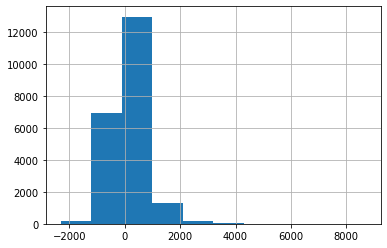

In [31]:
#np.log(df.sqft_living).hist()
df['log_sqft_living'] = np.log(df.sqft_living)
df['diff_lsf_neighbors'] = df.sqft_living - df.sqft_living15
df.diff_lsf_neighbors.hist()

In [54]:
mean_log_sqft_living = df.log_sqft_living.mean()
sigma_log_sqft_living = df.log_sqft_living.std()
df['log_normal_sf_living'] = (df.log_sqft_living - mean_log_sqft_living) / sigma_log_sqft_living

In [55]:
mean_sqft_living = df.sqft_living.mean()
sigma_sqft_living = df.sqft_living.std()
df['normal_sf_living'] = (df.sqft_living - mean_sqft_living) / sigma_sqft_living

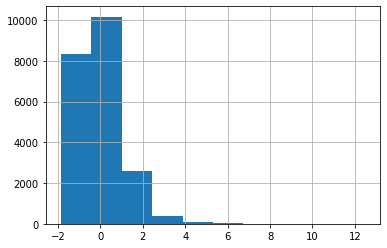

In [52]:
df.normal_sf_living.hist()

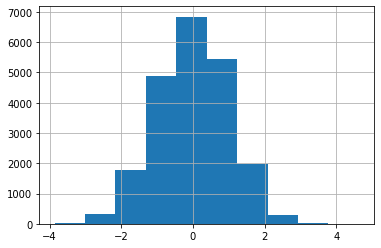

In [56]:
df.log_normal_sf_living.hist()

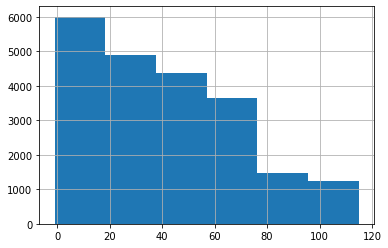

In [73]:
df.effective_age.hist(bins=6)

In [80]:
model = smf.ols('price ~ sqft_living*grade', data=df)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:40:27   Log-Likelihood:            -2.9760e+05
No. Observations:               21597   AIC:                         5.952e+05
Df Residuals:                   21593   BIC:                         5.952e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           4.17e+05   2.17e+04     19.205      0.000    3.74e+05     4.6e+05
sqft_living        -303.9983      8.933    -34.033      0.000    -321.507    -286.490
grade             -2.416e+04   3004.795     -8.040      0.000      -3e+04   -1.83e+04
sqft_living:grade    56.1517      0.980     57.277      0.000      54.230      58.073
==============================================================================
Omnibus:                    11294.712   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           259261.066
Skew:                           2.024   Prob(JB):                         0.00
Kurtosis:                      19.484   Cond. No.                     2.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

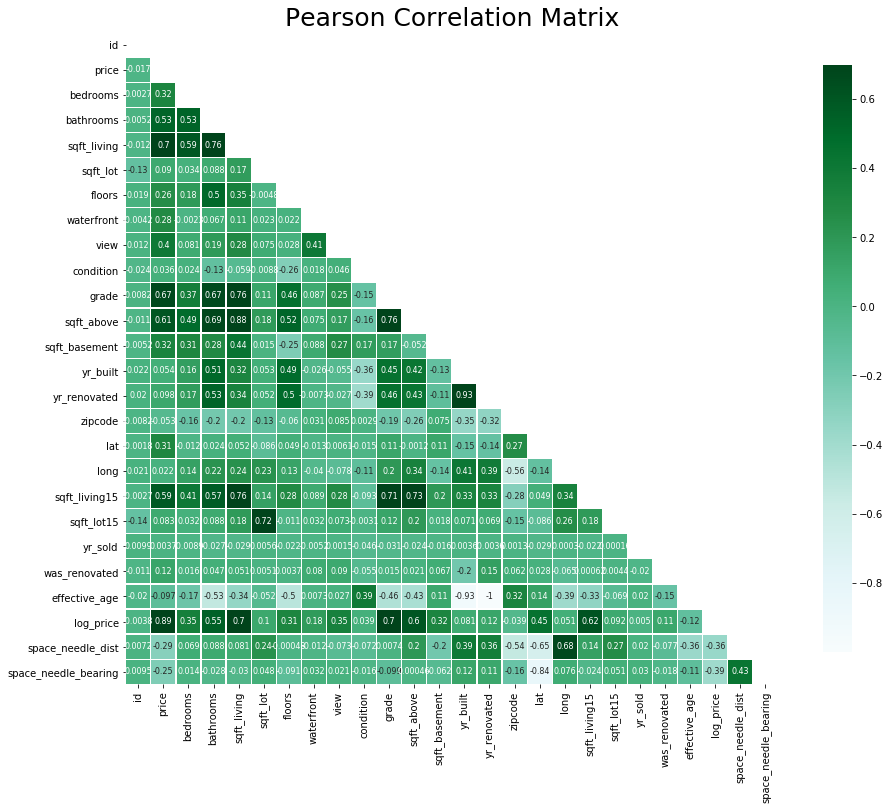

In [5]:
features = list(df.columns)

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});


In [81]:
df['split_level'] = df.floors % 1.0
df.split_level.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [82]:
df['split_level'] = df.floors % 1.0
df.split_level.value_counts()

0.0    19519
0.5     2078
Name: split_level, dtype: int64

In [88]:
model = smf.ols('price ~ floors*sqft_living', data=df)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     7177.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:58:59   Log-Likelihood:            -2.9992e+05
No. Observations:               21597   AIC:                         5.999e+05
Df Residuals:                   21593   BIC:                         5.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            1.47e+05   1.31e+04     11.204      0.000    1.21e+05    1.73e+05
floors             -1.161e+05   8105.759    -14.327      0.000   -1.32e+05      -1e+05
sqft_living          173.0898      6.669     25.956      0.000     160.019     186.161
floors:sqft_living    62.9601      3.752     16.779      0.000      55.605      70.315
==============================================================================
Omnibus:                    14232.934   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           467640.152
Skew:                           2.694   Prob(JB):                         0.00
Kurtosis:                      25.150   Cond. No.                     3.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=16)


In [7]:
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_lat_long_logprice = train_set[['lat', 'long', 'log_price']]

train_scaled = scaler.fit_transform(train_lat_long_logprice)
pd.DataFrame(train_scaled).describe()



,0,1,2
count,1.727700e+04,1.727700e+04,1.727700e+04
mean,-2.450371e-14,-1.110319e-14,1.147899e-15
std,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.901535e+00,-2.162501e+00,-3.394225e+00
25%,-6.489703e-01,-8.150584e-01,-7.025647e-01
50%,8.293319e-02,-1.200615e-01,-5.248630e-02
75%,8.536988e-01,6.316697e-01,6.280447e-01
max,1.572648e+00,6.376031e+00,5.362304e+00


Text(0, 0.5, 'Inertia')

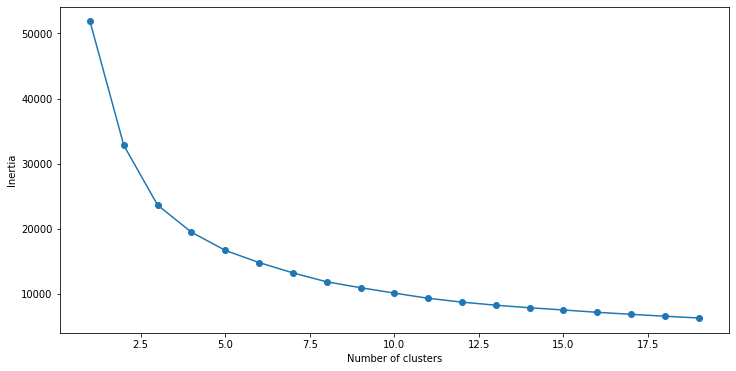

In [8]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(train_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [10]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(train_scaled)
train_pred = kmeans.predict(train_scaled)


train_frame = pd.DataFrame(train_scaled)
train_frame['cluster'] = train_pred
train_frame['cluster'].value_counts()

train_centers = kmeans.cluster_centers_
train_centers_frame = pd.DataFrame(scaler.inverse_transform(train_centers), columns=['klat', 'klong', 'log'])[['klat','klong']]
train_centers_frame


,klat,klong
0,47.437909,-122.320536
1,47.607904,-122.029939
2,47.382330,-122.126165
3,47.678423,-122.311900
4,47.617790,-122.252363


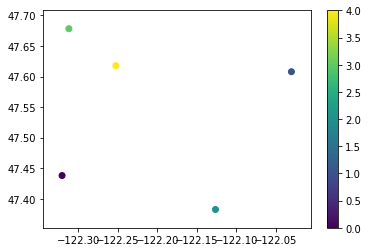

In [36]:
plt.scatter(train_centers_frame.klong, train_centers_frame.klat, c = train_centers_frame.index,
           label = train_centers_frame.index)
plt.colorbar()

In [11]:
def distance_from(flat, flong, lat, long):
    """return 'as the crow flies' distance in miles from the 
    space needle, given latitude and longitude coordinates of a location"""
    # Convert lat/longitudes to radians
    def to_radians(latlong):
        return latlong / 57.29577951
    # lat/long of input
    loc_lat = to_radians(lat)
    loc_long = to_radians(long)
    c_lat = to_radians(flat)
    c_long = to_radians(flong)
    # distance in miles
    d = 3963.0 * np.arccos((np.sin(c_lat) * np.sin(loc_lat))\
                           + np.cos(c_lat) * np.cos(loc_lat)\
                           * np.cos(loc_long - c_long))
    return d


# Create a Function for computing the bearing relative from space needle
# of a given lat/long point
def bearing_from(flat, flong, lat, long):
    """return bearing theta in radians for given location's
    bearing relative to the space needle. Takes latitude and longitude
    of the location."""
    delta_fi = np.log(np.tan(flat / 2 + np.pi/4) / np.tan(lat / 2 + np.pi/4))
    delta_lon = abs(flong - long)
    bearing = np.arctan2(delta_lon, delta_fi)
    return bearing

In [12]:
train_set['dist_c0'] = distance_from(train_centers_frame['klat'][0], train_centers_frame['klong'][0], train_set.lat, train_set.long)
train_set['bear_c0'] = bearing_from(train_centers_frame['klat'][0], train_centers_frame['klong'][0], train_set.lat, train_set.long)
train_set['dist_c1'] = distance_from(train_centers_frame['klat'][1], train_centers_frame['klong'][1], train_set.lat, train_set.long)
train_set['bear_c1'] = bearing_from(train_centers_frame['klat'][1], train_centers_frame['klong'][1], train_set.lat, train_set.long)
train_set['dist_c2'] = distance_from(train_centers_frame['klat'][2], train_centers_frame['klong'][2], train_set.lat, train_set.long)
train_set['bear_c2'] = bearing_from(train_centers_frame['klat'][2], train_centers_frame['klong'][2], train_set.lat, train_set.long)
train_set['dist_c3'] = distance_from(train_centers_frame['klat'][3], train_centers_frame['klong'][3], train_set.lat, train_set.long)
train_set['bear_c3'] = bearing_from(train_centers_frame['klat'][3], train_centers_frame['klong'][3], train_set.lat, train_set.long)
train_set['dist_c4'] = distance_from(train_centers_frame['klat'][4], train_centers_frame['klong'][4], train_set.lat, train_set.long)
train_set['bear_c4'] = bearing_from(train_centers_frame['klat'][4], train_centers_frame['klong'][4], train_set.lat, train_set.long)
train_set.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,dist_c0,bear_c0,dist_c1,bear_c1,dist_c2,bear_c2,dist_c3,bear_c3,dist_c4,bear_c4
10728,2881700273,2014-08-19,385000.0,4,2.00,1820,7102,1.0,NaN,0.0,...,21.220536,0.010018,16.645619,1.070081,26.710811,0.455704,4.618699,0.150738,9.390575,0.446273
7610,1823059106,2015-04-28,288250.0,3,1.75,2110,15400,1.0,0.0,0.0,...,5.536576,1.075340,12.440428,2.169292,8.563564,0.741382,13.893046,2.761415,9.191386,2.961618
605,240000058,2015-04-08,469000.0,4,2.75,3550,13938,1.0,0.0,0.0,...,1.970263,1.917101,17.314593,2.235544,7.913122,1.294914,17.580420,3.038594,13.411315,2.996406
10826,1232001040,2014-10-16,435000.0,3,1.00,1180,4219,1.0,0.0,0.0,...,17.415962,0.205410,17.110016,1.315030,24.114463,0.646414,3.130833,1.424177,7.548860,1.004822
4360,4468400214,2014-10-10,318000.0,3,2.25,1250,1017,3.0,NaN,0.0,...,18.821883,0.041051,15.783206,1.197629,24.629178,0.519831,2.388569,0.513692,7.395936,0.643778


In [22]:
train_set['cluster'] = train_frame['cluster']
train_set.head()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,bear_c0,dist_c1,bear_c1,dist_c2,bear_c2,dist_c3,bear_c3,dist_c4,bear_c4,cluster
10728,2881700273,2014-08-19,385000.0,4,2.00,1820,7102,1.0,NaN,0.0,...,0.010018,16.645619,1.070081,26.710811,0.455704,4.618699,0.150738,9.390575,0.446273,2.0
7610,1823059106,2015-04-28,288250.0,3,1.75,2110,15400,1.0,0.0,0.0,...,1.075340,12.440428,2.169292,8.563564,0.741382,13.893046,2.761415,9.191386,2.961618,0.0
605,240000058,2015-04-08,469000.0,4,2.75,3550,13938,1.0,0.0,0.0,...,1.917101,17.314593,2.235544,7.913122,1.294914,17.580420,3.038594,13.411315,2.996406,2.0
10826,1232001040,2014-10-16,435000.0,3,1.00,1180,4219,1.0,0.0,0.0,...,0.205410,17.110016,1.315030,24.114463,0.646414,3.130833,1.424177,7.548860,1.004822,1.0
4360,4468400214,2014-10-10,318000.0,3,2.25,1250,1017,3.0,NaN,0.0,...,0.041051,15.783206,1.197629,24.629178,0.519831,2.388569,0.513692,7.395936,0.643778,4.0


In [19]:
model = smf.ols('log_price ~ sqft_living + dist_c0*bear_c0 + bear_c1 + dist_c2*bear_c2 + dist_c3*bear_c3 + dist_c4*bear_c4', data=train_set)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5110.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:09:18   Log-Likelihood:                 785.59
No. Observations:               17277   AIC:                            -1541.
Df Residuals:                   17262   BIC:                            -1425.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.8975      0.048    267.130      0.000      12.803      12.992
sqft_living         0.0004   2.08e-06    171.370      0.000       0.000       0.000
dist_c0            -0.0230      0.002     -9.693      0.000      -0.028      -0.018
bear_c0             0.2216      0.008     26.284      0.000       0.205       0.238
dist_c0:bear_c0     0.0269      0.001     19.623      0.000       0.024       0.030
bear_c1             0.0695      0.007      9.329      0.000       0.055       0.084
dist_c2             0.0069      0.002      3.372      0.001       0.003       0.011
bear_c2             0.1473      0.009     15.836      0.000       0.129       0.166
dist_c2:bear_c2     0.0149      0.001     14.231      0.000       0.013       0.017
dist_c3             0.0815      0.004     18.231      0.000       0.073       0.090
bear_c3             0.1328      0.007     18.714      0.000       0.119       0.147
dist_c3:bear_c3    -0.0554      0.002    -31.321      0.000      -0.059      -0.052
dist_c4            -0.1112      0.004    -24.826      0.000      -0.120      -0.102
bear_c4            -0.1945      0.011    -18.075      0.000      -0.216      -0.173
dist_c4:bear_c4     0.0282      0.002     14.466      0.000       0.024       0.032
==============================================================================
Omnibus:                     1310.403   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7465.044
Skew:                           0.043   Prob(JB):                         0.00
Kurtosis:                       6.219   Cond. No.                     6.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

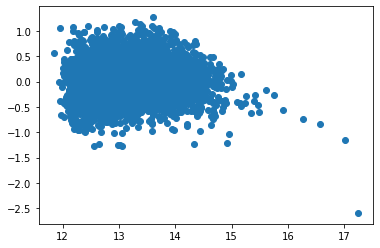

In [26]:
x_preds = train_set[['sqft_living', 'dist_c0', 'bear_c0', 'bear_c1', 'dist_c2', 'bear_c2', 'dist_c3', 'bear_c3', 'dist_c4', 'bear_c4']]
y_actual = train_set['log_price']
model_predictions = fitted_model.predict(x_preds)
residuals = y_actual - model_predictions
plt.scatter(model_predictions, residuals)


In [28]:
test_set['dist_c0'] = distance_from(train_centers_frame['klat'][0], train_centers_frame['klong'][0], test_set.lat, test_set.long)
test_set['bear_c0'] = bearing_from(train_centers_frame['klat'][0], train_centers_frame['klong'][0], test_set.lat, test_set.long)
test_set['dist_c1'] = distance_from(train_centers_frame['klat'][1], train_centers_frame['klong'][1], test_set.lat, test_set.long)
test_set['bear_c1'] = bearing_from(train_centers_frame['klat'][1], train_centers_frame['klong'][1], test_set.lat, test_set.long)
test_set['dist_c2'] = distance_from(train_centers_frame['klat'][2], train_centers_frame['klong'][2], test_set.lat, test_set.long)
test_set['bear_c2'] = bearing_from(train_centers_frame['klat'][2], train_centers_frame['klong'][2], test_set.lat, test_set.long)
test_set['dist_c3'] = distance_from(train_centers_frame['klat'][3], train_centers_frame['klong'][3], test_set.lat, test_set.long)
test_set['bear_c3'] = bearing_from(train_centers_frame['klat'][3], train_centers_frame['klong'][3], test_set.lat, test_set.long)
test_set['dist_c4'] = distance_from(train_centers_frame['klat'][4], train_centers_frame['klong'][4], test_set.lat, test_set.long)
test_set['bear_c4'] = bearing_from(train_centers_frame['klat'][4], train_centers_frame['klong'][4], test_set.lat, test_set.long)



test_x_preds = test_set[['sqft_living', 'dist_c0', 'bear_c0', 'bear_c1', 'dist_c2', 'bear_c2', 'dist_c3', 'bear_c3', 'dist_c4', 'bear_c4']]

test_preds = fitted_model.predict(test_x_preds)

log_price_mean = test_set.log_price.mean()
TSS = ((test_set.log_price - (log_price_mean))**2).sum()
RSS = ((test_set.log_price - test_preds)**2).sum()

R_sq = 1 - (RSS / TSS)

R_sq

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

0.809901189011705

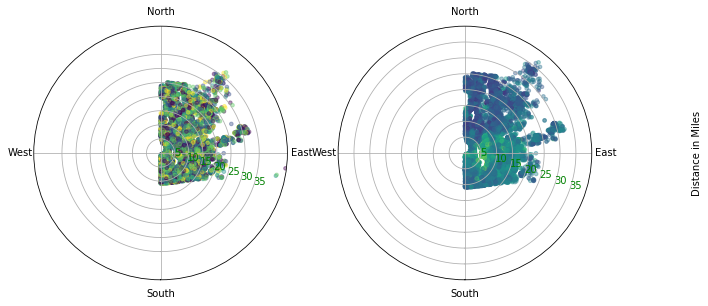

In [24]:
# df['cluster'] = pred

# df['log10_price'] = np.log10(df.price)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
# plt.style.use('seaborn-white')
r = train_set.space_needle_dist
theta = train_set.space_needle_bearing
area = train_set.log_price
colors = train_set.cluster


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, alpha=0.4 )
ax.set_theta_zero_location('W', offset=90)
ax.set_xticks(np.array([0, 90, 180, 270])*np.pi/180)
ax.set_xticklabels(['South','East', 'North', 'West'])
#ax.set_rticks([0,5,10,15,20,25,30,35,40,45,50])
ax.set_rmax(45)
#ax.set_tickparams(axis='y', colors='red')
#ax.r_label_position('right')
ax.set_rgrids([5,10,15,20,25,30,35], angle=70, color='green')
ax.set_ylabel('Distance in Miles', labelpad=100)
ax.yaxis.set_label_position('right')
#ax.set_title('Distance and Direction from Space Needle, colored by Log 10 Sale Price')




ax1 = fig.add_subplot(122, projection='polar')
c2 = ax1.scatter(theta, r, c=area, s=area, alpha=0.4)
ax1.set_theta_zero_location('W', offset=90)
ax1.set_xticks(np.array([0, 90, 180, 270])*np.pi/180)
ax1.set_xticklabels(['South','East', 'North', 'West'])
#ax.set_rticks([0,5,10,15,20,25,30,35,40,45,50])
ax1.set_rmax(40)
#ax.set_tickparams(axis='y', colors='red')
#ax.r_label_position('right')
ax1.set_rgrids([5,10,15,20,25,30,35], angle=70, color='green')
ax1.set_ylabel('Distance in Miles', labelpad=100)
ax1.yaxis.set_label_position('right')
#ax1.set_title('Distance and Direction from Space Needle, colored by Log 10 Sale Price')

# ax3 = fig.add_subplot(133, projection='polar')
# c3 = ax3.scatter(theta, r, c=colors2, s=area, alpha=0.4)
# ax3.set_theta_zero_location('W', offset=90)
# ax3.set_xticks(np.array([0, 90, 180, 270])*np.pi/180)
# ax3.set_xticklabels(['South','East', 'North', 'West'])
# #ax.set_rticks([0,5,10,15,20,25,30,35,40,45,50])
# ax3.set_rmax(40)
# #ax.set_tickparams(axis='y', colors='red')
# #ax.r_label_position('right')
# ax3.set_rgrids([5,10,15,20,25,30,35], angle=70, color='green')
# ax3.set_ylabel('Distance in Miles', labelpad=100)
# ax3.yaxis.set_label_position('right')
# #ax.set_title('Distance and Direction from Space Needle, colored by Log 10 Sale Price')



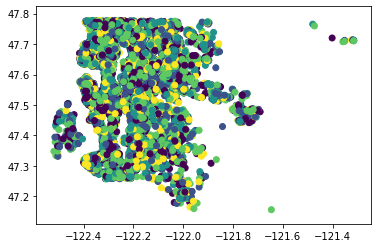

In [25]:
plt.scatter(train_set.long, train_set.lat, c=train_set.cluster)

In [104]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


lat_long_logprice = df[['lat', 'long', 'log_price']]
data_scaled = scaler.fit_transform(lat_long_logprice)


db = DBSCAN(eps=0.3, min_samples=10).fit(data_scaled)

labels = db.labels_

df['cluster_db'] = labels

df.head()




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,space_needle_bearing,bedrooms_per_sf,log_sqft_living,diff_lsf_neighbors,normal_sf_living,log_normal_sf_living,split_level,cluster,log10_price,cluster_db
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,2.489966,0.002542,7.073270,-160,-0.980629,-1.125556,0.0,3,5.346157,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0.251870,0.001167,7.851661,880,0.533357,0.709446,0.0,0,5.730782,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.699198,0.002597,6.646391,-1950,-1.427201,-2.131893,0.0,0,5.255273,-1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,2.765356,0.002041,7.580700,600,-0.131054,0.070674,0.0,0,5.781037,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1.584611,0.001786,7.426549,-120,-0.436030,-0.292725,0.0,4,5.707570,0


In [108]:
df.cluster_db.value_counts()

 0    20862
-1      465
 1      198
 4       35
 3       21
 2       11
 5        5
Name: cluster_db, dtype: int64

In [149]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold',
       'was_renovated', 'effective_age', 'log_price', 'space_needle_dist',
       'space_needle_bearing', 'bedrooms_per_sf', 'log_sqft_living',
       'diff_lsf_neighbors', 'normal_sf_living', 'log_normal_sf_living',
       'cluster', 'log10_price', 'dist_c0', 'bear_c0', 'dist_c1', 'bear_c1',
       'dist_c2', 'bear_c2', 'dist_c3', 'bear_c3', 'dist_c4', 'bear_c4'],
      dtype='object')